# Qué hay acá?

En esta notebook se generarán los archivos nube de palabras y la tabla con el análisis de sentimientos

In [23]:
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TELMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Sentimientos

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')
stop_words = stopwords.words('spanish')

In [17]:
politico = 'catacora'

df = pd.read_excel('../data/raw/' + politico + '-preproc.xlsx')
df.head()

,texto-traducido,texto-original
0,At Casa Grande del Pueblo we listen to the co...,En Casa Grande del Pueblo escuchamos las preoc...
1,To speak of our Departmental Workers Center #...,Hablar de nuestra Central Obrera Departamental...
2,#LIVE It is an honor to participate in the an...,#ENVIVO\nEs un honor participar en el aniversa...
3,We salute the commitment of social organizatio...,Saludamos el compromiso de las organizaciones ...
4,The municipality of Laja is one of the jewels...,El municipio de Laja es una de las joyas que t...


In [18]:
# creando las funciones para generar las nuevas columnas

def compound_nltk(text):
    try:
        return SentimentIntensityAnalyzer().polarity_scores(text)['compound']
    except:
        return None

def polarity_tb(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

def subjectivity_tb(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None

In [19]:
# apply the functions to the dataframe
df['compound_nltk'] = df['texto-traducido'].apply(compound_nltk)
df['polarity_tb'] = df['texto-traducido'].apply(polarity_tb)
df['subjectivity_tb'] = df['texto-traducido'].apply(subjectivity_tb)

df.head()

,texto-traducido,texto-original,compound_nltk,polarity_tb,subjectivity_tb
0,At Casa Grande del Pueblo we listen to the co...,En Casa Grande del Pueblo escuchamos las preoc...,0.7178,0.033333,0.066667
1,To speak of our Departmental Workers Center #...,Hablar de nuestra Central Obrera Departamental...,0.8777,0.075000,0.333333
2,#LIVE It is an honor to participate in the an...,#ENVIVO\nEs un honor participar en el aniversa...,0.8126,0.018182,0.300000
3,We salute the commitment of social organizatio...,Saludamos el compromiso de las organizaciones ...,0.5848,0.037424,0.226667
4,The municipality of Laja is one of the jewels...,El municipio de Laja es una de las joyas que t...,0.9157,0.616667,0.916667


In [20]:

# export to json in ../data/1_intermediate
df.to_json('../data/intermediate/' + politico + '-sentimientos.json', orient='records', lines=True)
#df.to_excel('../data/1_intermediate/0_intermediate-sentimientos.xlsx', index=False)

### Nube de palabras

In [26]:
import matplotlib.pyplot as plt

In [34]:
politico = 'lfcamacho'

df = pd.read_excel('../data/raw/' + politico + '-preproc.xlsx')
#df.head()

df = df["texto-original"]

# drop duplicates
df = df.drop_duplicates()

print(df.shape)
#df.head()

# lower case and remove punctuation
df = df.str.lower().str.replace('[^\w\s]','')
#df.head()

for i in range(df.shape[0]):
    try:
        while '\n' in df.iloc[i]:
            df.iloc[i].text = df.iloc[i].text.replace('\n', ' ')
        while '\t' in df.iloc[i]:
            df.iloc[i].text = df.iloc[i].text.replace('\t', ' ')
    except:
        pass

df.head()

(272,)


C:\Users\TELMA\AppData\Local\Temp\ipykernel_6020\3943547726.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df = df.str.lower().str.replace('[^\w\s]','')


0    cruceños sostengamos este paro con métodos pac...
1    nuestros abuelos y nuestros padres nos enseñar...
2    y ese convencimiento nos da la moral suficient...
3    el mas lo que ha hecho es traer gente de otros...
4    no es un cabildo es un intento de avasallamien...
Name: texto-original, dtype: object

In [35]:
stop_words = stop_words + ['rt', 'si', 'ser', 'q', 'tan', ',', '.', 'http', 'https', 't', 'co']

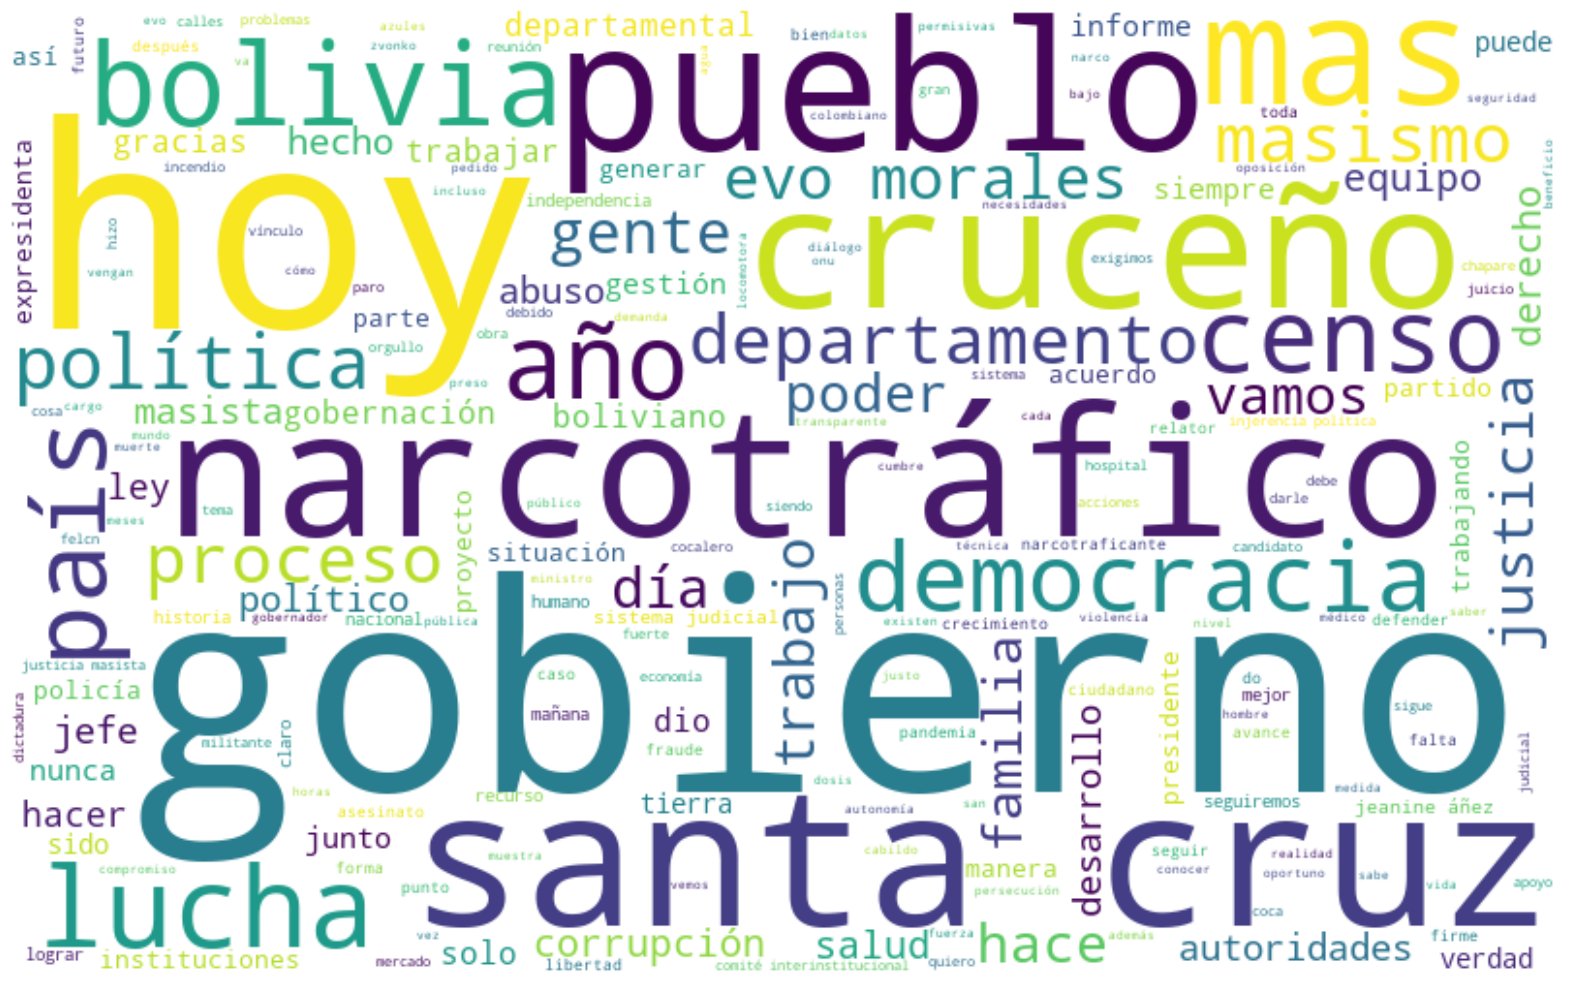

In [36]:
wordcloud = WordCloud(width=800,
                    height=500,
                    background_color ='white',
                    stopwords=stop_words,
                    random_state=21,
                    max_font_size=150).generate(' '.join(df))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
# export plot as png
wordcloud.to_file('../figures/' + politico + '-wordcloud.png')